In [2]:
'''
Author: daniel
Date: 2023-02-20 20:23:29
LastEditTime: 2023-02-20 20:27:07
LastEditors: daniel
Description: 
FilePath: /Cerberus-main/jupyters/nyud3.ipynb
have a nice day
'''

# !pip install ipykernel

import os 
os.chdir('/home/DISCOVER_summer2022/xusc/exp/Cerberus-main')
import matplotlib.pyplot as plt
import numpy as np 
import cv2
import torchvision.transforms as transforms
from utils import  * 
from PIL import Image
import math
from os.path import split,join,exists

#* initial
# plt.rcParams['figure.figsize'] = (8.0, 2.0) # 设置figure_size尺寸
# plt.rcParams['image.interpolation'] = 'nearest' # 设置 interpolation style
# plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style
# plt.rcParams['savefig.dpi'] = 300 #图片像素
# plt.rcParams['figure.dpi'] = 300 #分辨率
# 默认的像素：[6.0,4.0]，分辨率为100，图片尺寸为 600&400


Bad key text.latex.preview in file /home/DISCOVER_summer2022/xusc/.conda/envs/uav/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/DISCOVER_summer2022/xusc/.conda/envs/uav/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/DISCOVER_summer2022/xusc/.conda/envs/uav/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('s

In [5]:
path = '/home/DISCOVER_summer2022/xusc/exp/Cerberus-main/plot'
eval_dirs=[join(path,x) for x in os.listdir(path) if x.startswith('eval_')]


## change the 'RINDNet-ResNet50' to 'RINDNet'

In [1]:

import glob 
import sys
def cp_file():
    for d in eval_dirs:
        need_to_change_files = glob.glob(join(d,"RINDNet-ResNet50*"))


        for f in need_to_change_files:    
            # print(f,f.replace('-ResNet50',''))
            
            command = f"cp {f} {f.replace('-ResNet50','')}"
            print(command)

            os.system(command)

        

    


## plot NYUDv2  normal and depth edge  

In [5]:
from dataloaders.datasets.nyud3 import Nyud3


datasets = Nyud3()

In [19]:
from tqdm import tqdm
def resize(img):
    return img[45:471, 41:601] #* (426,560)

save_dir = 'logs/nyudv2_egde_qualitative_results_canny'

make_dir(save_dir)
plt.rcParams['figure.figsize'] = ( 18.0,5.0) # 设置figure_size尺寸
plt.rcParams['savefig.dpi'] = 200 #图片像素
plt.rcParams['figure.dpi'] = 200 #分辨率

for idx in tqdm(range(datasets.__len__())):
    image,label,edge,depth_map,depth_edge,normal_map,normal_edge,name =datasets.getitem_all(idx)
    save_path = join(save_dir,name)
    if not exists(save_path):
        show_imgs([resize(image),resize(normal_edge),resize(depth_edge)],[0,1,1],['origin image','normal edge','depth edge'],img_name=save_path,fontsize=20)
        
    

 18%|█▊        | 115/654 [29:25<2:17:53, 15.35s/it]


In [2]:
image_name=['39.png',
 '55.png',
 '62.png',
 '76.png',
 '124.png',
 '170.png',
 '181.png',
 '186.png',
 '198.png',
 '201.png',
 '221.png',
 '270.png',
 '324.png',
 '358.png',
 '475.png',
 '510.png',
 '561.png',
 '562.png']

18it [00:31,  1.75s/it]


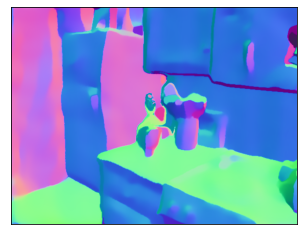

In [6]:
from tqdm import tqdm
def resize(img):
    return img[45:471, 41:601] #* (426,560)



save_dir = 'logs/for_qualiative_results_nyudv2'
depth_save_dir = join(save_dir,'depth')
depth_map_save_dir = join(save_dir,'depth_map')
normal_save_dir = join(save_dir,'normal')
normal_map_save_dir = join(save_dir,'normal_map')
image_save_dir = join(save_dir,'image')
make_dir(save_dir)
make_dir(depth_save_dir)
make_dir(normal_save_dir)
make_dir(depth_map_save_dir)
make_dir(normal_map_save_dir)
make_dir(image_save_dir)



# plt.rcParams['figure.figsize'] = ( 18.0,5.0) # 设置figure_size尺寸
# plt.rcParams['savefig.dpi'] = 200 #图片像素
# plt.rcParams['figure.dpi'] = 200 #分辨率

# import matplotlib
# plt.rcParams.update(matplotlib.rcParamsDefault)

for idx,name in tqdm(enumerate(image_name)):

    image,label,edge,depth_map,depth_edge,normal_map,normal_edge,name =datasets.getitem_by_name(name)

    cv2.imwrite(join(depth_save_dir,name),resize(depth_edge))
    cv2.imwrite(join(normal_save_dir,name),resize(normal_edge))
    
    # cv2.imwrite(join(depth_map_save_dir,name),resize(depth_map))
    # cv2.imwrite(join(normal_map_save_dir,name),resize(normal_map))

    show_imgs([resize(depth_map)],[0],img_name=join(depth_map_save_dir,name))
    show_imgs([resize(normal_map)],[0],img_name=join(normal_map_save_dir,name))
    cv2.imwrite(join(image_save_dir,name),resize(image))

    # save_path = join(save_dir,name)
    # if not exists(save_path):
    #     show_imgs([resize(image),resize(normal_edge),resize(depth_edge)],[0,1,1],['origin image','normal edge','depth edge'],img_name=save_path,fontsize=20)
    

## ISTD dataset qualitative results

In [2]:
from dataloaders.datasets.istd import ISTD
dataset  = ISTD(path='/home/DISCOVER_summer2022/xusc/exp/Cerberus-main/data/ISTD/ISTD_Dataset',subset='test')

2023-02-28 13:37:16.445 | INFO     | dataloaders.datasets.istd:__init__:85 -  length : 540,540 
2023-02-28 13:37:16.447 | INFO     | dataloaders.datasets.istd:__init__:87 - ready to process data
100%|██████████| 540/540 [00:03<00:00, 159.28it/s]
2023-02-28 13:37:19.860 | INFO     | dataloaders.datasets.istd:__init__:89 - process done 
100%|██████████| 540/540 [00:03<00:00, 177.68it/s]


In [3]:
for idx in range(dataset.__len__()):
    image,shadow_mask,edge = dataset.getitem_all(idx)
    
    
    # show_imgs([image,edge],[0,0])
    break
    # if idx == 10:
    #     break

In [ ]:
def detect_edge(map,low_threshold=100,high_threshold=200):
    tmp = np.uint8(map)
    tmp=cv2.GaussianBlur(tmp, (3, 3), 0)
    return cv2.Canny(tmp,low_threshold,high_threshold)


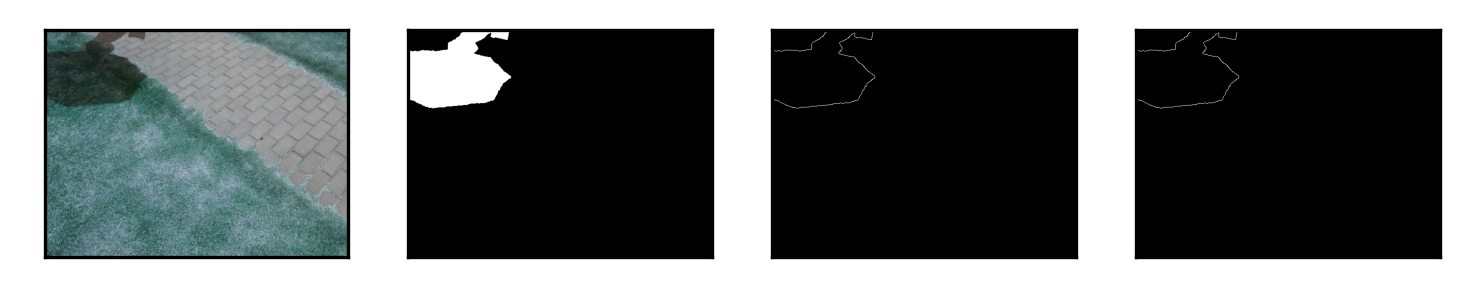

In [22]:


# detect_edge
image,shadow_mask,edge = dataset.getitem_all(32)

show_imgs([image,shadow_mask,edge,detect_edge(shadow_mask)],[0,1,1,1])

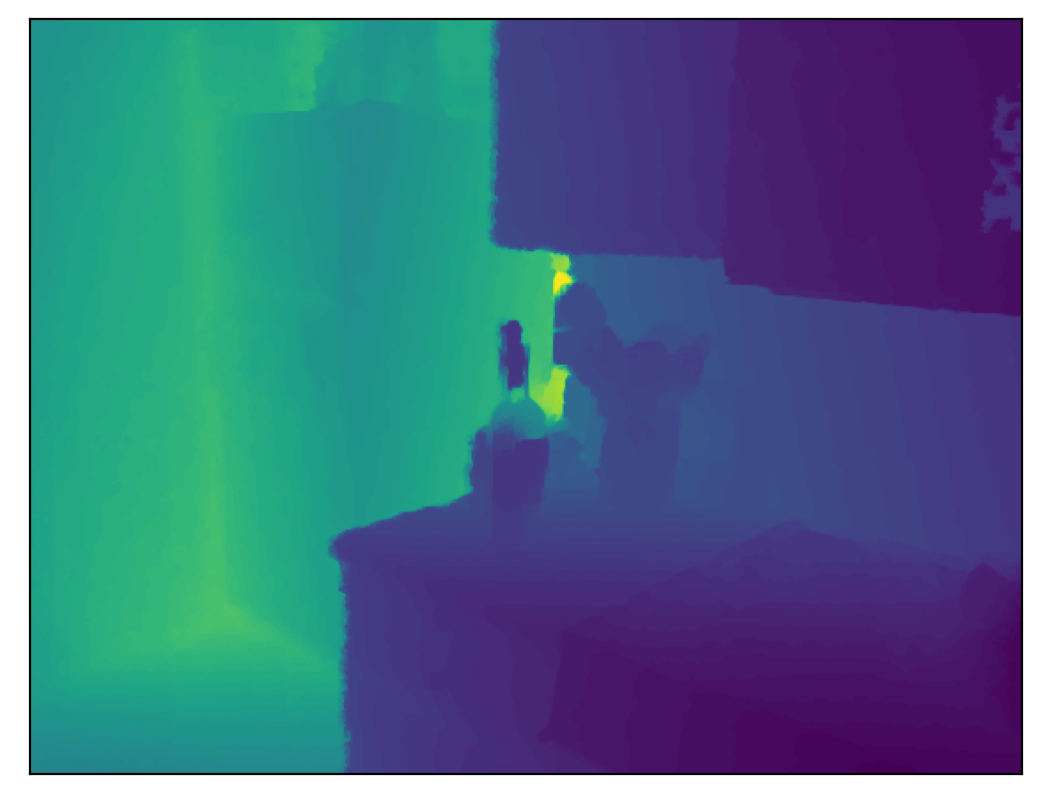

## IIW qualiative results

In [1]:
from dataloaders.datasets.iiw_dataset import IIWDataset

ModuleNotFoundError: No module named 'dataloaders'

In [8]:
test_dataset = IIWDataset(data_dir='/home/DISCOVER_summer2022/xusc/exp/Cerberus-main/data/IIW/iiw-dataset',split='test')

In [ ]:
test_dataset